In this notebook we do $KKL$ gradient descent for different dimention $d$. We adapt the parameters $h$ and $\sigma$ to the dimension. 

In [1]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import time

import kkl.divergences as dv
import kkl.kernels as kl
import kkl.gradient_descent as gd
import kkl.generate_y as gy
import cProfile

# p and q gaussians

In [2]:
##############################
######## PARAMETERS ##########
##############################

n = 50 # nombre de particules pour p
m = 50 # nombre de particules pour q
T = 100 # nombre d'itérations
eps = 0.0001
alpha = 0.01

### KERNEL ###


3.047261560235742


C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized\kkl\divergences.py:10: RuntimeWarning: invalid value encountered in log
  return np.where(t > 0, np.log(t), 0.)


expe_d_2_alpha_0.001_particles.npy
expe_d_2_alpha_0.001_KKL.npy
1.7557983960945565


C:\Users\cleme\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


expe_d_2_alpha_0.01_particles.npy
expe_d_2_alpha_0.01_KKL.npy


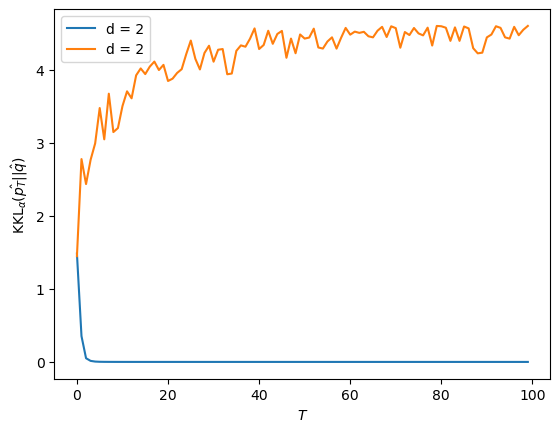

In [5]:

d = 2

for alpha in [0.001, 0.01]:#
    

    
    mu_x = np.ones(d)
    mu_y = np.zeros(d)
    Lx = np.random.randn(d,d)
    Ly = np.random.randn(d,d)
    Sigmax = Lx.T @ Lx
    Sigmay = Ly.T @ Ly
    
    x0 = scs.multivariate_normal.rvs(mu_x,Sigmax,n)
    y = scs.multivariate_normal.rvs(mu_y,Sigmay,m)
    # np.median(np.linalg.norm(x0[None,:] - y[:,None],axis = 2)) 
    sigma = 4*np.sqrt(1/(n+m)**2 * np.sum((x0[:,None]-y[None,:])**2)) * (n+m)**(-1/(d+4))#np.around(np.mean(np.abs(x0[:,None]-y[None,:])**2),decimals = 1)
    print(sigma)
    k = lambda x,y :  kl.k_gauss(x,y,sigma)
    dk = lambda x,y : kl.dk_gauss(x,y,sigma)
 
    
    Ky = 1/m * k(y,y) 
    Ly,V = np.linalg.eig(Ky)
    V = V.transpose()
    Ly = np.real(Ly)
    Packy = [Ky,Ly,V]
    
    h = 2
    J = lambda x : dv.KKL(x, y, k, Packy, alpha) 
    dJ = lambda x : dv.WGrad_KKL(x, y, k, dk, Packy, alpha, sigma) 
    
    X,l_J,Grad = gd.gradient_descent(J, dJ, x0, h, eps, T)
    name_file_particles = 'expe_d_'+str(d)+'_alpha_'+str(alpha)+'_particles.npy'
    print(name_file_particles)
    np.save('save_data/3_rings/' + name_file_particles, X)
    
    name_file_KKL = 'expe_d_'+str(d)+'_alpha_'+str(alpha)+'_KKL.npy'
    print(name_file_KKL)
    np.save('save_data/3_rings/' + name_file_KKL, l_J)
    
    plt.plot(l_J,label = "d = " + str(d))
    

    
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p_T} || \hat{q})$")
#plt.title("Evolution of " + r"$KKL_{\alpha}(\hat{p_T} || \hat{q})$" + " along the iterations of gradient descent")
plt.savefig('plots_neurips/gd_gauss_d.pdf')



C:\Users\cleme\DOC\Annee_2023_2024\code\Regularized


C:\Users\cleme\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


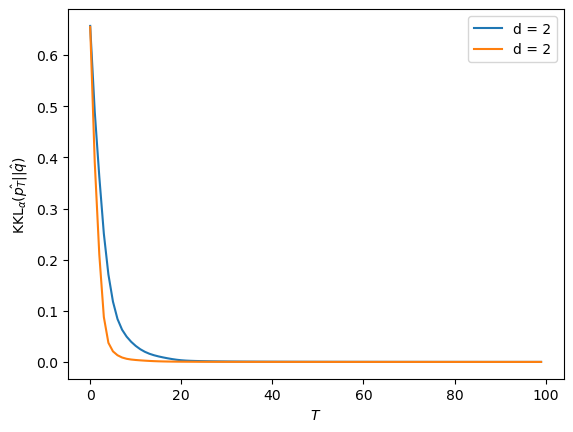

In [4]:
import os
cwd = os.getcwd()
print(cwd)

d = 2

for alpha in [0.001, 0.01]:
    
    path = '/save_data/GD_on_MOG/'
    name_file_KKL = 'expe_d_'+str(d)+'_alpha_'+str(alpha)+'_KKL.npy'
    
    name_file_KKL = cwd + path+name_file_KKL
    
    l_J_alpha = np.load(name_file_KKL)
    plt.plot(l_J_alpha,label = "d = " + str(d))

plt.legend()
plt.xlabel(r"$T$")
plt.ylabel(r"KKL$_{\alpha}(\hat{p_T} || \hat{q})$")
#plt.title("Evolution of " + r"$KKL_{\alpha}(\hat{p_T} || \hat{q})$" + " along the iterations of gradient descent")
plt.savefig('plots_neurips/gd_gauss_d.pdf')